## <center> CNN Exercise - Fashion MNIST </center>


### The Challenge

Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK: Use matplotlib to view an image from the data set. It can be any image from the data set.**

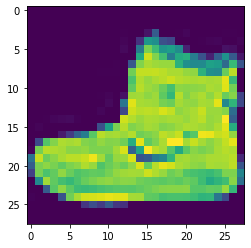

In [3]:
fig1 = x_train[0]

plt.imshow(fig1)

**TASK: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [4]:
max_val = 0
for image in x_train:
    val = image.max()
    if max_val < val:
        max_val = val 

max_val

x_train = x_train/max_val
x_test = x_test/max_val

**Task: Reshape the X arrays to include a 4 dimension of the single channel.**

In [5]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000,28,28,1)

**TASK: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', # avoids the encoding
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

**TASK: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [8]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),callbacks=[early_stop], verbose=1)

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4136 - accuracy: 0.8521 - val_loss: 0.3270 - val_accuracy: 0.8795
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2813 - accuracy: 0.8985 - val_loss: 0.3046 - val_accuracy: 0.8865
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2358 - accuracy: 0.9129 - val_loss: 0.2736 - val_accuracy: 0.8985
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2041 - accuracy: 0.9235 - val_loss: 0.2621 - val_accuracy: 0.9059
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1784 - accuracy: 0.9344 - val_loss: 0.2613 - val_accuracy: 0.9088
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1534 - accuracy: 0.9434 - val_loss: 0.2530 - val_accuracy: 0.9142
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1334 - accuracy: 0.9510 - val_loss: 0.2842 - va

**TASK: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [9]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.413628,0.852133,0.326997,0.8795
1,0.281348,0.898533,0.304572,0.8865
2,0.235781,0.912850,0.273569,0.8985
3,0.204051,0.923467,0.262119,0.9059
4,0.178434,0.934383,0.261332,0.9088
5,0.153415,0.943400,0.253011,0.9142
6,0.133433,0.950950,0.284213,0.9068
7,0.114852,0.957250,0.277029,0.9143


<AxesSubplot:>

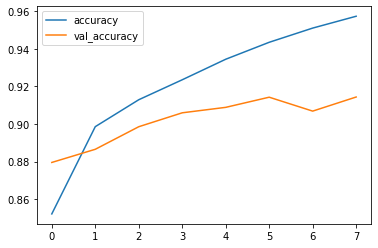

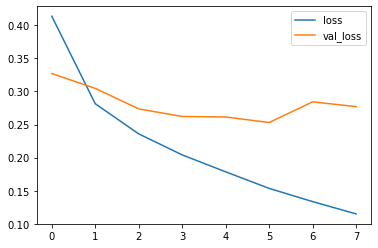

In [10]:
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [12]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test,verbose=0))

['loss', 'accuracy']
[0.27702903747558594, 0.9143000245094299]


In [13]:
predictions = model.predict(x_test)

y_pred = [val.argmax() for val in predictions]
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.88      0.86      1000
           3       0.93      0.90      0.91      1000
           4       0.84      0.90      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.68      0.74      1000
           7       0.94      0.99      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



array([[904,   0,  19,  13,   3,   1,  58,   0,   2,   0],
       [  2, 980,   3,   8,   5,   0,   1,   0,   1,   0],
       [ 18,   0, 883,   6,  59,   0,  33,   0,   1,   0],
       [ 26,   5,  11, 895,  26,   0,  34,   0,   3,   0],
       [  1,   2,  46,  14, 904,   0,  32,   0,   1,   0],
       [  0,   0,   0,   0,   0, 974,   0,  20,   0,   6],
       [124,   2,  87,  19,  82,   0, 677,   0,   9,   0],
       [  0,   0,   0,   0,   0,   3,   0, 986,   0,  11],
       [  2,   0,   2,   3,   1,   1,   4,   1, 986,   0],
       [  1,   0,   0,   0,   1,   6,   0,  38,   0, 954]], dtype=int64)